In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../data/raw/vehicles.csv')

In [3]:
df.shape

(426880, 26)

In [4]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

None

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [5]:
def profiling_dataset_transposed(df):
    # 1. Calcolo percentuale valori mancanti
    missing_pct = (df.isnull().sum() / len(df)) * 100
    
    # 2. Calcolo percentuale valori unici
    # (Numero di valori unici / Numero totale di righe) * 100
    unique_pct = (df.nunique() / len(df)) * 100
    
    # 3. Recupero dei tipi di dato (convertiti in stringa per leggibilità)
    dtypes = df.dtypes.astype(str)
    
    # Creazione del DataFrame con le righe richieste
    summary_df = pd.DataFrame([missing_pct, unique_pct, dtypes], 
                              index=['missing_values_%', 'unique_values_%', 'type'])
    
    return summary_df

In [6]:
# Applicazione ai tuoi DataFrame
df_stats = profiling_dataset_transposed(df)

# Visualizzazione
print("Analisi Dataset:")
display(df_stats)

Analisi Dataset:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
missing_values_%,0.0,0.0,0.0,0.0,0.0,0.282281,4.133714,1.236179,40.785232,41.62247,0.705819,1.030735,1.930753,0.598763,37.725356,30.586347,71.767476,21.752717,30.501078,0.01593,0.016398,100.0,0.0,1.534155,1.534155,0.01593
unique_values_%,100.0,100.0,0.09464,0.096749,3.667307,0.026705,0.009839,6.949728,0.001406,0.001874,0.001171,24.566623,0.001406,0.000703,27.704273,0.000703,0.000937,0.003045,0.002811,56.666745,84.546243,0.0,0.011947,12.458068,12.596514,89.377811
type,int64,object,object,object,int64,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,float64,object,float64,float64,object


<Axes: >

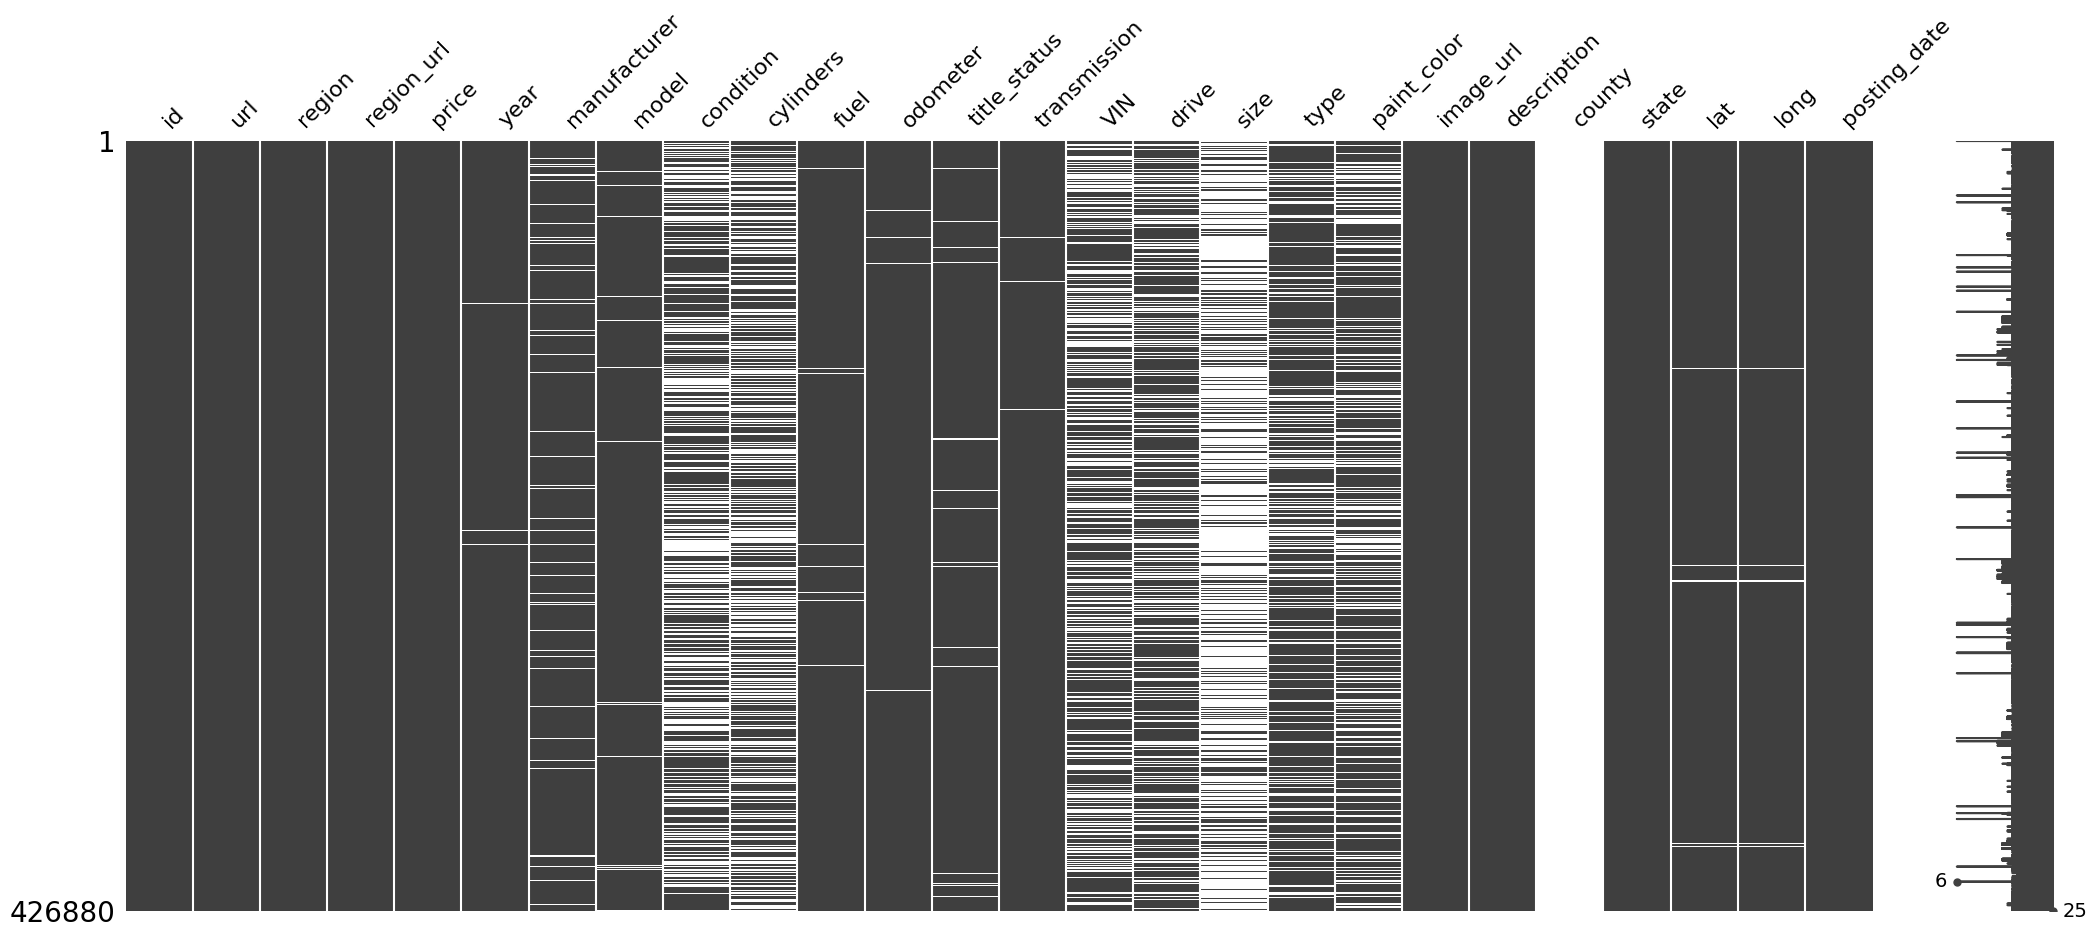

In [7]:
# Visualizzo il grafico dei missing values
msno.matrix(df)

In [7]:
soglia = 70.0
cols_to_drop = df_stats.columns[df_stats.loc['missing_values_%'] > soglia].tolist()
print(f"Colonne da eliminare (più del {soglia}% di valori mancanti): {cols_to_drop}")

Colonne da eliminare (più del 70.0% di valori mancanti): ['size', 'county']


In [8]:
df_processed = df.drop(columns=cols_to_drop)
df_processed.shape

(426880, 24)

In [9]:
colonne_critiche = ['manufacturer', 'model', 'year', 'odometer', 'fuel']

# Elimina le righe dove una delle colonne critiche è nulla
df_processed = df_processed.dropna(subset=colonne_critiche, how='any')

In [10]:
df_processed.shape

(397874, 24)

<Axes: >

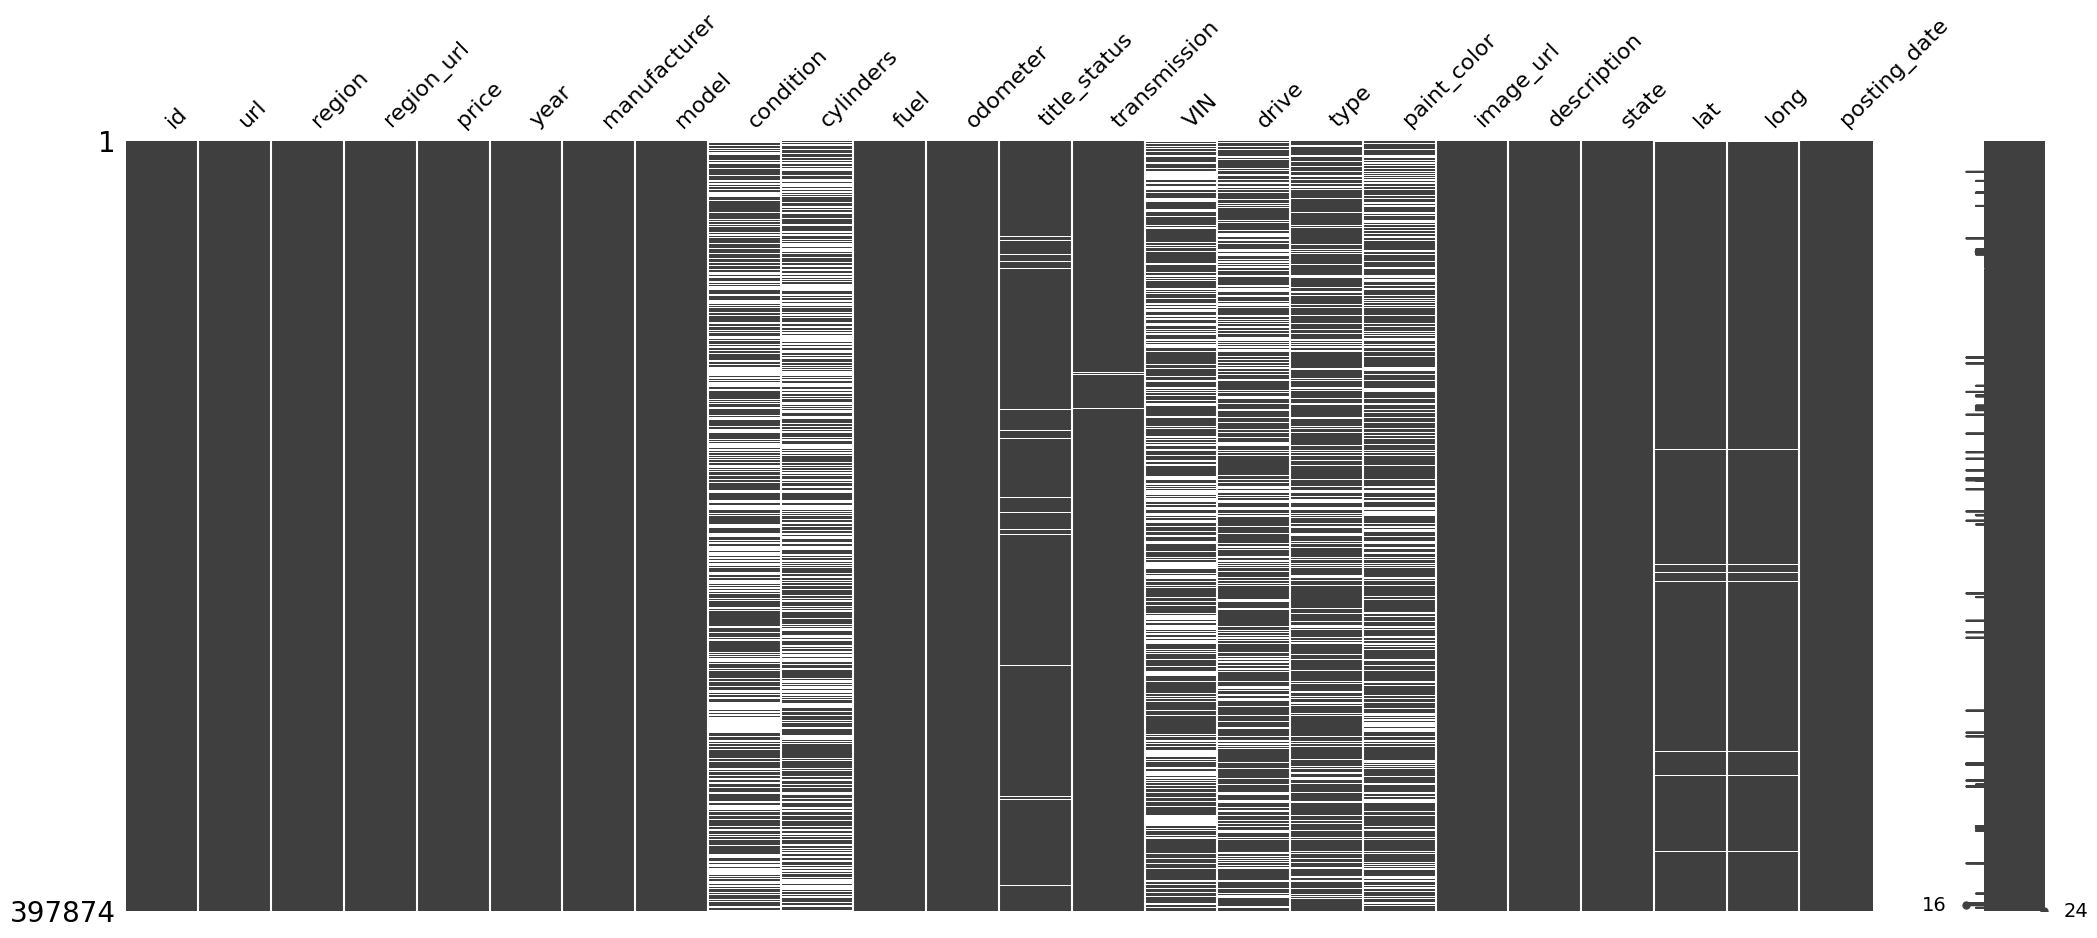

In [11]:
# Visualizzo il grafico dei missing values
msno.matrix(df_processed)

In [12]:
df_processed.to_csv('../data/processed/vehicles_processed.csv', index=False)